In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor , VisionEncoderDecoderModel
from PIL import Image

In [36]:
# Load data from IAM database
URL        = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
model_name = 'microsoft/trocr-small-handwritten'
image= Image.open(requests.get(URL , stream=True).raw).convert('RGB')

processor = TrOCRProcessor.from_pretrained(model_name)
model     = VisionEncoderDecoderModel.from_pretrained(model_name)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Model Result :
industry
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Handwriting Image :
AxesImage(size=(76, 248))


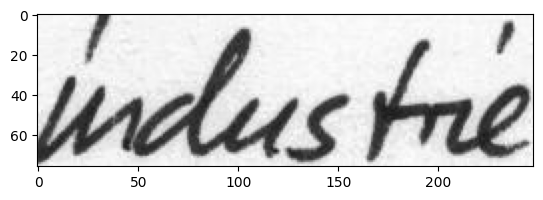

In [37]:
# let's Generate text from pretrained LLM

Inputs  = processor(images=image , return_tensors='pt').pixel_values
Generate= model.generate(Inputs)
Outputs = processor.batch_decode(Generate  , skip_special_tokens=True)[0]
## show the result
dash_line = ' '.join('-' for _ in range(100))

print(f'Model Result :\n{Outputs}')
print(dash_line)
print(f"Handwriting Image :\n{plt.imshow(image)}")

In [38]:
# Load data
train_data = pd.read_csv('/content/written_name_train_v2.csv')
train_data.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [39]:
train_data.describe()

,FILENAME,IDENTITY
count,330961,330396
unique,330961,100539
top,TRAIN_00001.jpg,THOMAS
freq,1,1825


In [40]:
## split the data into names and image file name
image_file_name  = train_data['FILENAME'].to_list()
image_names = train_data['IDENTITY'].to_list()

In [41]:
print(image_names[:5])

['BALTHAZAR', 'SIMON', 'BENES', 'LA LOVE', 'DAPHNE']


In [42]:
!ls /content/drive/My\ Drive/Colab Notebooks/train

ls: cannot access '/content/drive/My Drive/Colab': No such file or directory
ls: cannot access 'Notebooks/train': No such file or directory


In [43]:
folder_path = '/content/drive/My Drive/Colab Notebooksr'


In [44]:
import os
folder_path = '/content/drive/MyDrive/Colab Notebooks/train'
for filename in os.listdir(folder_path):
    print(filename)

TRAIN_00008.jpg
TRAIN_00020.jpg
TRAIN_00019.jpg
TRAIN_00014.jpg
TRAIN_00016.jpg
TRAIN_00013.jpg
TRAIN_00017.jpg
TRAIN_00015.jpg
TRAIN_00012.jpg
TRAIN_00011.jpg
TRAIN_00018.jpg
TRAIN_00010.jpg
TRAIN_00009.jpg
TRAIN_00002.jpg
TRAIN_00005.jpg
TRAIN_00004.jpg
TRAIN_00001.jpg
TRAIN_00007.jpg
TRAIN_00003.jpg
TRAIN_00006.jpg


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
pip install matplotlib pillow transformers


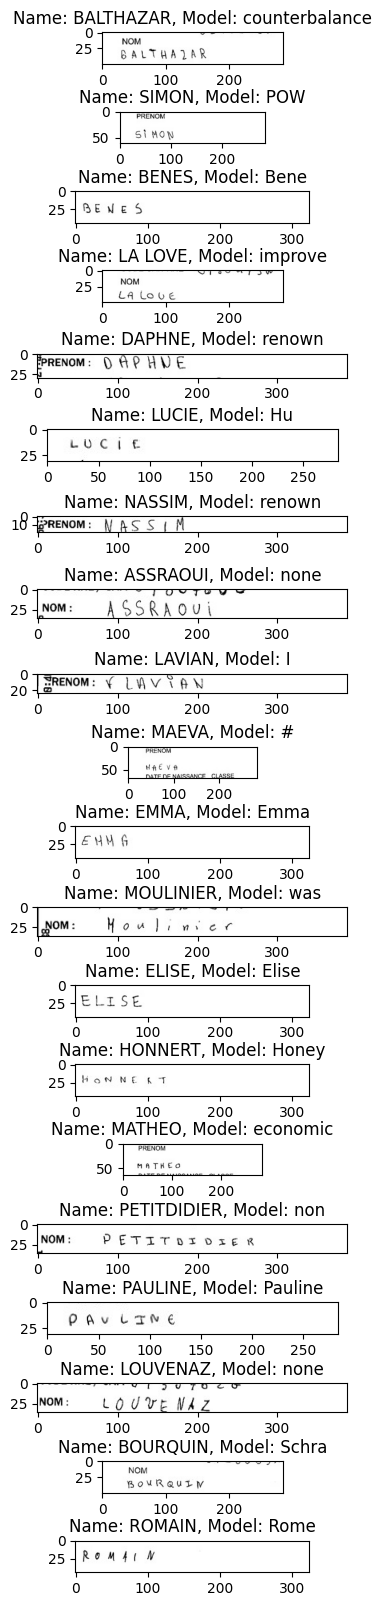

In [47]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoProcessor, AutoModelForSeq2SeqLM

# Path to the training images
train_path = '/content/drive/MyDrive/Colab Notebooks/train'

# Assuming 'image_file_name' and 'image_names' are predefined lists
# image_file_name contains the filenames of the images
# image_names contains the actual names corresponding to the images

# Create a figure with a specified size
fig, ax = plt.subplots(20, 1, figsize=(4, 20))

# Assuming 'processor' and 'model' are predefined
# Example initialization (replace with actual model and processor initialization)
# processor = AutoProcessor.from_pretrained('model_name')
# model = AutoModelForSeq2SeqLM.from_pretrained('model_name')

# Loop through the first 500 images
for i in range(20):
    # Get the image file name and the corresponding actual name
    name = image_file_name[i]
    actual_name = image_names[i]

    # Construct the full path to the image
    image_path = os.path.join(train_path, name)

    # Open the image
    image = Image.open(image_path)

    # Process the image
    inputs = processor(images=image, return_tensors='pt').pixel_values

    # Generate predictions using the model
    generated = model.generate(inputs, max_new_tokens=1)

    # Decode the model's output
    output_name = processor.batch_decode(generated, skip_special_tokens=True)[0]

    # Display the image with the title
    ax[i].imshow(image)
    ax[i].set_title(f'Name: {actual_name}, Model: {output_name}')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1.5)
plt.show()